<h1 align="center">Computational Methods in Environmental Engineering</h1>
<h2 align="center">Lecture #16</h2>
<h3 align="center">20 Apr 2023</h3>



## More xarray



In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Interpolation



-   We can use `sel` and `isel` to select data based on coordinates
    
    -   What if we wanted to estimate data values at coordinates not included in our dataset?
    
    Let's start with a simple example



In [2]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
f = xr.DataArray(x**2, dims=['x'], coords={'x': x})
f

<xarray.DataArray (x: 11)>
array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100])
Coordinates:
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10

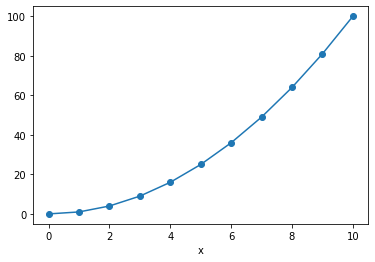

In [3]:
f.plot(marker='o')

What is the value at 4.5?



In [4]:
f.sel(x=4.5)

KeyError: "not all values found in index 'x'. Try setting the `method` keyword argument (example: method='nearest')."

In [5]:
f.interp(x=4.5)

<xarray.DataArray ()>
array(20.5)
Coordinates:
    x        float64 4.5

Uses [scipy.interpolate](https://docs.scipy.org/doc/scipy/reference/interpolate.html) under the hood, with different modes of interpolation.



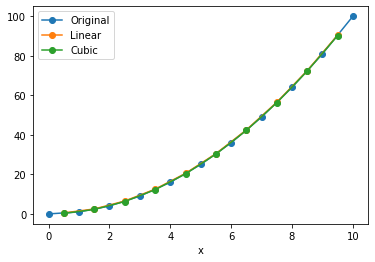

In [6]:
x_new = x + 0.5
f_lin = f.interp(x=x_new, method='linear')
f_cub = f.interp(x=x_new, method='cubic')
f.plot(marker='o', label="Original")
f_lin.plot(marker='o', label="Linear")
f_cub.plot(marker='o', label="Cubic")
plt.legend()

## Let's revisit groupby



Analyze some sea surface temperature data



In [7]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url, drop_variables=['time_bnds'])
ds = ds.sel(time=slice('1960', '2018')).load()
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 708)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2018-12-01
Data variables:
    sst      (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2023-04-04
    DODS_EXTRA.Unlimited_Dimension:  time

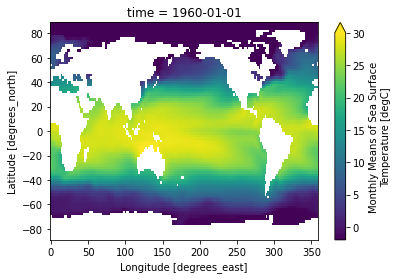

In [8]:
ds.sst[0].plot(vmin=-2, vmax=30)

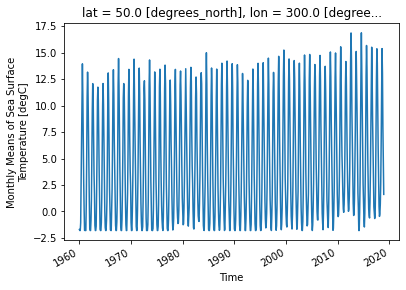

In [9]:
ds.sst.sel(lon=300, lat=50).plot()

### groupby Split



In [11]:
ds.time.dt

In [15]:
ds.time.dt.month

<xarray.DataArray 'month' (time: 708)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
...
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2018-12-01

In [16]:
gb = ds.sst.groupby('time.month')
gb

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

### groupby Map



In [17]:
sst_mm = gb.mean(dim='time')
sst_mm

<xarray.DataArray 'sst' (month: 12, lat: 89, lon: 180)>
array([[[-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-1.7995034, -1.7995957, -1.7998441, ..., -1.7997916,
         -1.7996523, -1.7995055],
        [-1.7995698, -1.7997586, -1.8000009, ..., -1.8000009,
         -1.7998224, -1.7996049],
        [-1.8000009, -1.8000009, -1.8000009, ..., -1.8000009,
         -1.8000009, -1.8000009],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

Climatology at specific location



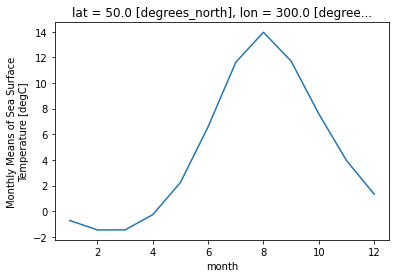

In [18]:
sst_mm.sel(lon=300, lat=50).plot()

Zonal mean climatology



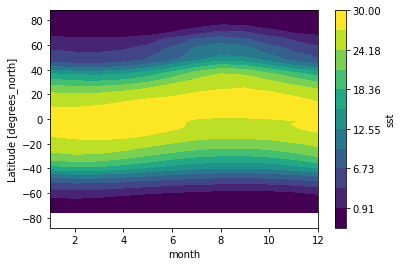

In [21]:
sst_mm.mean(dim='lon').transpose().plot.contourf(levels=12, vmin=-2, vmax=30)

Difference between March and September climatology



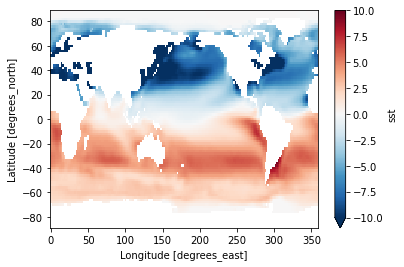

In [22]:
(sst_mm.sel(month=3) - sst_mm.sel(month=9)).plot(vmax=10)

## ☛ Hands-on exercise



-   We want to remove the climatology and extract the *anomalies*, e.g. subtract the January mean from all January values
-   Realizing that the `groupby` object contains the labeled data can you apply simple arithmetic to calculate the anomalies?



In [24]:
sst_anom = ds.sst.groupby(ds.time.dt.month) - sst_mm
sst_anom

<xarray.DataArray 'sst' (time: 708, lat: 89, lon: 180)>
array([[[ 9.5367432e-07,  9.5367432e-07,  9.5367432e-07, ...,
          9.5367432e-07,  9.5367432e-07,  9.5367432e-07],
        [ 9.5367432e-07,  9.5367432e-07,  9.5367432e-07, ...,
          9.5367432e-07,  9.5367432e-07,  9.5367432e-07],
        [ 9.5367432e-07,  9.5367432e-07,  9.5367432e-07, ...,
          9.5367432e-07,  9.5367432e-07,  9.5367432e-07],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[ 9.5367432e-07,  9.5367432e-07,  9.5367432e-07, ...,
          9.5367432e-07,  9.5367432e-07,  9.5367432e-07],
        [ 9.5367432e-07,  9.5367432e-07,  9.5367432e-07, ...,
          9.5367432e-07,  9.5367432e-07,  9.5367432e-07],
        [ 9.5367432e-07,  9.5367432e-07,  9.5367432e-07, ...,
          9.5367432e-07,  9.5367432e-07,  9.5367432e-07],
...
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[-4.9650669e-04, -4.0423870e-04, -1.5580654e-04, ...,
         -2.0837784e-04, -3.4761429e-04, -4.9448013e-04],
        [-4.3010712e-04, -2.4139881e-04,  9.5367432e-07, ...,
          9.5367432e-07, -1.7750263e-04, -3.9505959e-04],
        [ 9.5367432e-07,  9.5367432e-07,  9.5367432e-07, ...,
          9.5367432e-07,  9.5367432e-07,  9.5367432e-07],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2018-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

Plot the anomaly time series for the same location as before



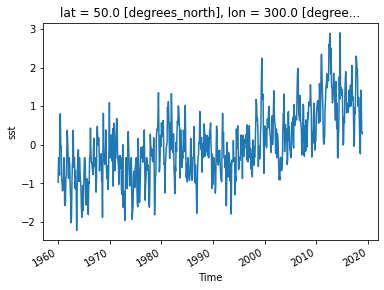

In [25]:
sst_anom.sel(lon=300, lat=50).plot()

Plot a global map of the difference between 1/1/2010 and 1/1/1960



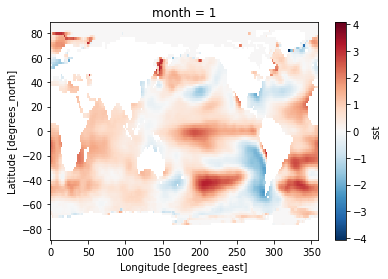

In [29]:
(sst_anom.sel(time="2010-1-1") - sst_anom.sel(time="1960-1-1")).plot()

## Resample, Rolling, Coarsen etc.



Almost identical to `pandas`



In [30]:
ds_resample = ds.resample(time='5Y').mean(dim='time')
ds_resample

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 13)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-12-31 1965-12-31 ... 2020-12-31
Data variables:
    sst      (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2023-04-04
    DODS_EXTRA.Unlimited_Dimension:  time

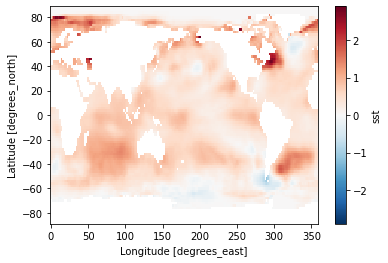

In [31]:
(ds_resample.sel(time='2015-01-01', method='nearest') -
 ds_resample.sel(time='1965-01-01', method='nearest')).sst.plot()

Moving window operations



In [32]:
ds_rolling = ds.rolling(time=12, center=True).mean()
ds_rolling

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 708)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2018-12-01
Data variables:
    sst      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2023-04-04
    DODS_EXTRA.Unlimited_Dimension:  time

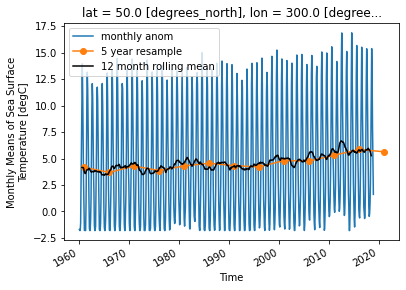

In [33]:
ds.sst.sel(lon=300, lat=50).plot(label='monthly anom')
ds_resample.sst.sel(lon=300, lat=50).plot(marker='o', label='5 year resample')
ds_rolling.sst.sel(lon=300, lat=50).plot(label='12 month rolling mean', color='k')
plt.legend()

## ☛ Hands-on exercise



Let's reproduce the following figure

<img src="https://www.ncdc.noaa.gov/monitoring-content/teleconnections/eln-f-pg.gif">

-   The Niño 3.4 region is defined as the region between +/- 5 deg. lat, 170 W - 120 W lon.
-   Warm or cold phases of the Oceanic Niño Index are defined by a five consecutive 3-month running mean of sea surface temperature (SST) anomalies in the Niño 3.4 region that is above the threshold of +0.5°C (warm), or below the threshold of -0.5°C (cold). This is known as the Oceanic Niño Index (ONI).

Load the data from [http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc](http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc), drop the `time_bnds` variable and extract the data after 1950



In [2]:
ds = xr.open_dataset("http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc",
                    drop_variables=['time_bnds'])
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 2031)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2023-03-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2023-04-04
    DODS_EXTRA.Unlimited_Dimension:  time

Calculate the climatology and anomalies



In [3]:
sst = ds.sst.sel(lat=slice(5,-5), lon=slice(190,240))
anom = sst.groupby('time.month') - sst.groupby('time.month').mean('time')
anom

<xarray.DataArray 'sst' (time: 2031, lat: 5, lon: 26)>
array([[[-0.45277977, -0.5866337 , -0.66270065, ...,  0.29915237,
          0.28580475,  0.24720383],
        [-0.67183495, -0.8674679 , -0.9579525 , ...,  0.37463188,
          0.37885094,  0.3616619 ],
        [-0.73293877, -0.98077774, -1.067625  , ...,  0.3456974 ,
          0.37148857,  0.3693142 ],
        [-0.5637913 , -0.7560253 , -0.89564705, ...,  0.19991684,
          0.22242737,  0.22611809],
        [-0.24372101, -0.41464806, -0.58384514, ...,  0.02549934,
          0.04180717,  0.04294586]],

       [[-0.35217094, -0.570158  , -0.7073593 , ...,  0.2655506 ,
          0.1847229 ,  0.08327293],
        [-0.6274433 , -0.9228382 , -1.0744762 , ...,  0.48350525,
          0.42597198,  0.32654953],
        [-0.7571926 , -1.1022224 , -1.2422161 , ...,  0.5859432 ,
          0.5550709 ,  0.4682808 ],
        [-0.6336956 , -0.90727997, -1.0895805 , ...,  0.4573593 ,
          0.42799568,  0.36167145],
        [-0.3273945 , -0.5622215 , -0.76956177, ...,  0.21449089,
...
          0.07704163,  0.14917374],
        [-0.28931046, -0.28551292, -0.2831955 , ...,  0.01772118,
          0.09174919,  0.16412354],
        [-0.33486748, -0.32231712, -0.30630302, ...,  0.03225327,
          0.0956707 ,  0.1571331 ],
        [-0.31251717, -0.31071663, -0.29837418, ...,  0.06702232,
          0.11439133,  0.16225052],
        [-0.22559166, -0.23402023, -0.24390602, ...,  0.07379723,
          0.11408997,  0.15569305]],

       [[ 0.07743263,  0.06193733,  0.04790115, ...,  0.1534214 ,
          0.21411324,  0.2985859 ],
        [-0.01200104, -0.00946808, -0.00742149, ...,  0.2783451 ,
          0.33838654,  0.41038895],
        [-0.05051994, -0.04175758, -0.03244209, ...,  0.38058472,
          0.43349075,  0.4865036 ],
        [-0.02856636, -0.03022957, -0.02880096, ...,  0.4670868 ,
          0.505682  ,  0.5439396 ],
        [ 0.0443821 ,  0.03486633,  0.01682281, ...,  0.49720383,
          0.5270729 ,  0.5592499 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 4.0 2.0 0.0 -2.0 -4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2023-03-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 5 6 7 8 9 10 11 12 1 2 3

Now plot the data!



In [4]:
oni = anom.mean(['lat', 'lon']).sel(time=slice("1950", "2020")).to_pandas()
oni

time
1950-01-01   -1.666537
1950-02-01   -1.313873
1950-03-01   -1.006423
1950-04-01   -1.057600
1950-05-01   -1.313092
                ...   
2020-08-01   -0.098410
2020-09-01   -0.369221
2020-10-01   -0.713343
2020-11-01   -0.927503
2020-12-01   -0.760277
Length: 852, dtype: float32

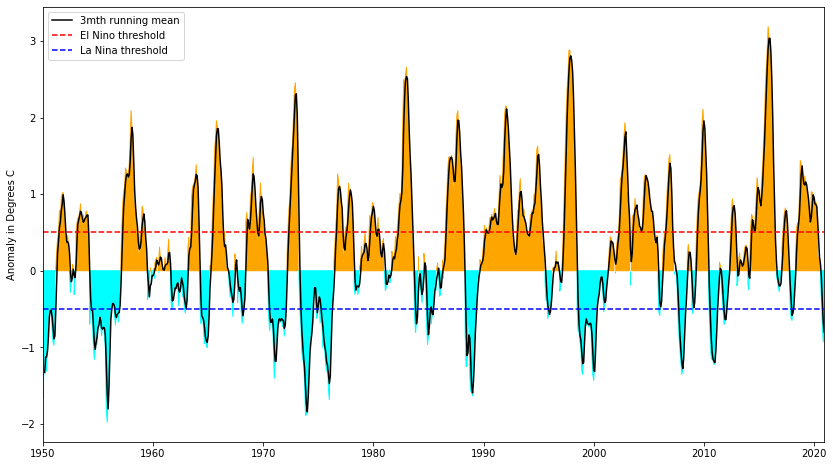

In [10]:
oni = anom.mean(['lat', 'lon']).sel(time=slice("1950", "2020")).to_pandas()
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.fill_between(oni.index, 0, oni, where=oni>0, color='orange')
ax.fill_between(oni.index, 0, oni, where=oni<0, color='cyan')
oni3 = oni.rolling(3).mean()
ax.plot(oni3.index, oni3, color='black', label='3mth running mean')
ax.plot(oni.index, [0.5]*len(oni), color='red', linestyle='--', label='El Nino threshold')
ax.plot(oni.index, [-0.5]*len(oni), color='blue', linestyle='--', label='La Nina threshold')
ax.set_xlim(pd.Timestamp(oni.index[0]), pd.Timestamp(oni.index[-1]))
ax.set_ylabel('Anomaly in Degrees C')
plt.legend()

Generate a time series that has True/False for positive/negative ENSO phases



<AxesSubplot:xlabel='time'>

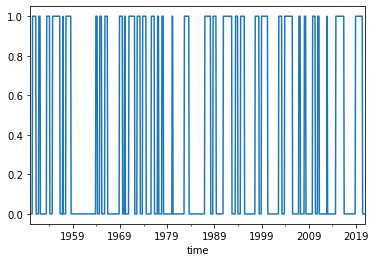

In [50]:
enso = oni3.copy()
enso[:] = 0
enso[oni3 > 0.5] = 1
enso[oni3 < -0.5] = 1
phases = enso.rolling(5).sum() == 5
phases.astype('int').plot()